# Codes and Code Breaking

In this unit, we will start to explore the *neural code*. You can think of the neural code as a dictionary that links brain activity to particular events in the world.

We'll start the exploration of neural codes by looking at codes in general. Consider the code below - it will create an *encrypted* version of user-submitted text using a letter substitution scheme. 

In [10]:
def substituteCode(text, s):
    # create a placeholder for the result
    result = ""
    
    # create substitute letter by letter
    for i in range(len(text)):
        # isolate the current character
        char = text[i]
        
        # map the character to keyboard code plus "s"
        result += chr((ord(char) + s - 97) % 26+97)
        
    return result

Let's try this out. Create a text variable with any lowercase text of your choice. Use the number 4 for S for now.

In [11]:
text = 'my cat is very silly' # put your text in the quotes
s = 4
substituteCode(text, s)

'qcrgexrmwrzivcrwmppc'

The code shifts each character by 4 positions in the alphabet. "A" now equals "D", etc. Prove this to yourself by setting s=1.

In [13]:
text = 'my cat is very silly' # put your text in the quotes
s = 1
substituteCode(text, s)

'nzodbuojtowfszotjmmz'

Here is a sentence that was encrypted in this way. I won't tell you the *s* that I used to do it. What do you think the code is saying? **Discussion** what are some things you could try to find out?

nenah qjyyh lxmn rb cqn bjvn. nenah dwqjyyh lxmn rb dwqjyyh rw rcb xfw fjh.

In [ ]:
# Write some strategies here. What patterns have you uncovered?
# structure -> what is the most common? 
# two letter words might be easier
# if we can map one thing we do know, that can help us bootstrap
# brute force 
# examine encoding model
# start with what you know
# looking at rules of bigrams and trigrams
# two-letter words are rare
# where do vowels appear in a word?
# which letters are the most frequently?

### Making inferences about the neural code

Let's now example the behavior a real ferret neuron. The code in the cell below loads in data from a ferret V1 neuron (visual system) that was recorded by the Sur lab at MIT. 

In [14]:
from scipy.io import loadmat

V1_data = loadmat('V1Orientation.mat')
spikes = V1_data['spikes']
print(spikes.shape)

(18, 3500, 30)


Within the data file there is a 3-dimenisional matrix saved as the variable *spikes*. The first dimension describes the stimulus condition: the first 16 items represent stimulus orientation between 0-337.5 degrees in 22.5 degree increments, starting at 0. The last two are blank control conditions where a uniform gray background was presented.

The second dimension represents the neuron's response (sampled at 1000𝐻𝑧). This dimension is a binary vector in which 1 represents a spike being fired. In this experiment, a grating (stripes of a particular orientation) was turned on at 𝑡=0, the grating began moving at 500 𝑚𝑠, and the stimulus was turned off at 2500 𝑚𝑠.

The third dimension represents trial repetitions. There are 30 trials in each condition.

Let's first average over trials to get an average response for each condition. **np.mean()** is a good method for averaging over a single dimension of a matrix. For example:

```python
np.mean(myArray, axis=0)
```

would average the array according to the first dimension (i.e. the rows). Save your trial average in a variable called *trialAverage*.

In [15]:
trialAverage = np.mean(spikes, axis=2)

Let's verify that trialAverage is an 18x3500 matrix by printing its shape.

In [16]:
print(trialAverage.shape)

(18, 3500)


We know that the last two conditions of our matrix are controls. These should show the baseline activity level of the neuron, but are not very interesting to us now. 

Using subsetting, "slice" off the last two items in the first dimension. Create a new variable called *onlyExperimental* that contains the first 16 conditions. This array should be 16x3500 when you print its shape.

In [17]:
onlyExperimental = trialAverage[0:16, :]
print(onlyExperimental.shape)

(16, 3500)


We want to know how many spikes were observed, on average, in each of the 16 experimental conditions. We want to start counting spikes when the grating started moving (500 ms) and stop counting spikes when the stimulus left the screen (2500 ms).

You may do this either in a loop or by taking advantage of the "axis" argument in **np.sum()**. Save your result to a variable called *spikeCounts*.

In [19]:
import numpy as np
spikeCounts = np.zeros(16)

for i in range(16):
    spikeCounts[i] = np.sum(onlyExperimental[i,499:2500])

print(spikeCounts)

spikeCounts2 = np.sum(onlyExperimental[:, 499:2500], axis=1)
print(spikeCounts2)

[ 2.6         1.43333333  2.73333333  5.3        22.46666667 62.4
 56.03333333 13.06666667  2.          0.7         0.76666667  5.96666667
 24.16666667 31.66666667 24.56666667 10.1       ]
[ 2.6         1.43333333  2.73333333  5.3        22.46666667 62.4
 56.03333333 13.06666667  2.          0.7         0.76666667  5.96666667
 24.16666667 31.66666667 24.56666667 10.1       ]


Now, let's create a vector called *orientation* that stores which orientation was presented in each of the 16 experimental conditions.

In [22]:
orientation = np.arange(0, 360, 22.5)
print(orientation.shape)
print(spikeCounts.shape)

(16,)
(16,)


Create a plot that shows spike counts as a function of orientation. Label your axes appropriately. With your group, **discuss** the pattern that you see. If I were to show you some neural data from an unlabeled condition, how easy or hard would it be to *predict* which orientation it was from?

Text(0, 0.5, 'Spike Counts')

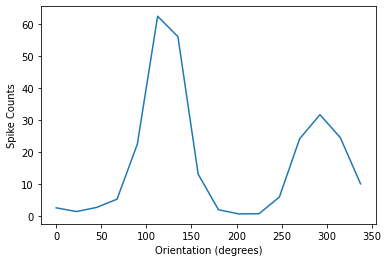

In [25]:
import matplotlib.pyplot as plt

plt.plot(orientation, spikeCounts)
plt.xlabel("Orientation (degrees)")
plt.ylabel("Spike Counts")

In [31]:
max(spikeCounts)
idx, = np.where(spikeCounts==max(spikeCounts))
print(idx)
print(orientation[idx])

[5]
[112.5]


Good job today! Please submit this notebook on Lyceum for grading!